In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.manifold import TSNE
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
records_filename = "../src/records.csv"
df = pd.read_csv(records_filename)
df.head()

,gc1.weight,gc1.bias,gc2.weight,gc2.bias,test_loss,test_acc
0,"[0.15616929531097412, -0.14084579050540924, 0....","[0.20967049896717072, 0.08637463301420212, 0.2...","[1.6327654123306274, -1.7827364206314087, 1.81...","[0.04640437290072441, -0.7518940567970276, 0.2...",0.713344,0.834
1,"[0.04237071052193642, -0.09666293859481812, 0....","[0.239383727312088, 0.1274496465921402, 0.1389...","[-1.3655169010162354, -1.8171098232269287, -1....","[0.3723544776439667, 0.22779211401939392, -0.1...",0.703776,0.849
2,"[0.004041607026010752, 0.12446201592683792, 0....","[0.1846570372581482, 0.1955045461654663, 0.180...","[-0.40830639004707336, -1.6099077463150024, -1...","[0.20870068669319153, 0.7221537232398987, 0.35...",0.733493,0.833
3,"[0.19494974613189697, 0.05041505768895149, -0....","[0.20956595242023468, 0.17455855011940002, 0.1...","[1.0028496980667114, -2.141828775405884, 2.004...","[-0.24065986275672913, 1.5230792760849, 0.0864...",0.794521,0.816
4,"[0.17001837491989136, 0.09082416445016861, 0.0...","[0.1885671764612198, 0.166299507021904, 0.1284...","[-1.074949026107788, -1.7430163621902466, 1.65...","[0.13336946070194244, -1.0270949602127075, 1.1...",0.727133,0.813


In [5]:
X = np.array([ast.literal_eval(i) for i in df['gc1.weight']])

(177, 22928)

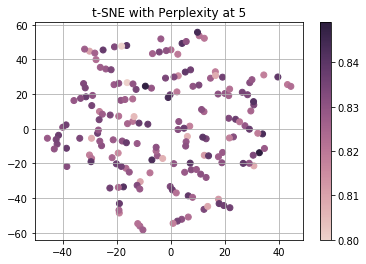

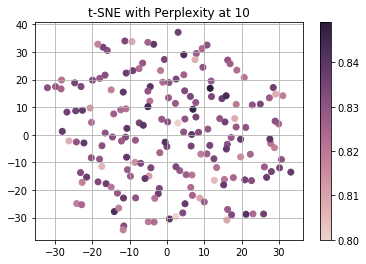

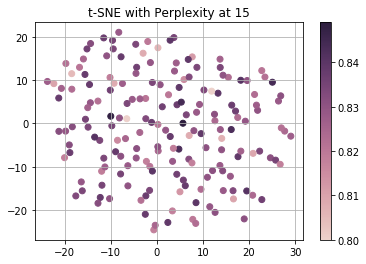

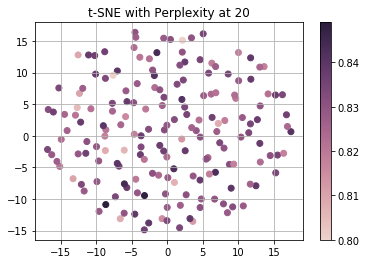

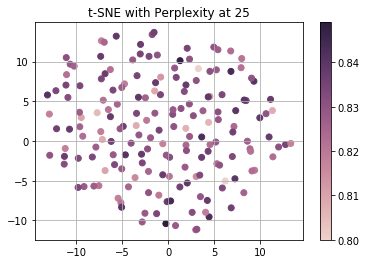

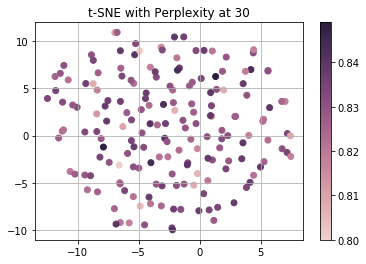

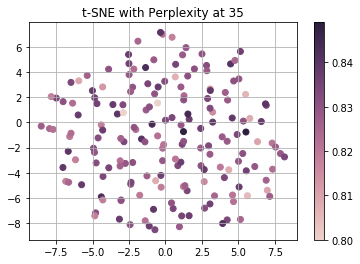

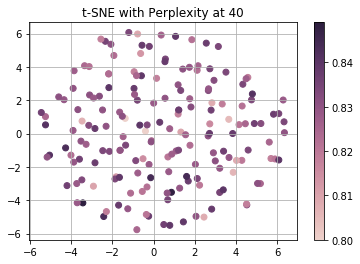

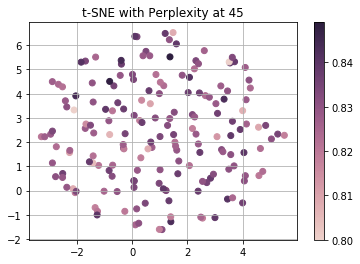

In [11]:
perplexity_range = range(5, 50, 5)
for p in perplexity_range:
    tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=p)
    Y = tsne.fit_transform(X)
    cmap = sns.cubehelix_palette(as_cmap=True)

    f, ax = plt.subplots()
    points = ax.scatter(Y[:,0], Y[:, 1], c=df['test_acc'], cmap=cmap)
    _ = ax.grid()
    plt.title(f't-SNE with Perplexity at {p}')
    f.colorbar(points)
    plt.show()